# Example Failure Case

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.image as mpl_img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from htc.context.models.context_evaluation import glove_runs
from htc.context.settings_context import settings_context
from htc.cpp import map_label_image
from htc.fonts.set_font import set_font
from htc.models.image.DatasetImage import DatasetImage
from htc.settings_seg import settings_seg
from htc.tivita.DataPath import DataPath
from htc.utils.blosc_compression import decompress_file
from htc.utils.Config import Config

set_font(18)

## Find occlusion free sample image with good performance

In [2]:
label_mapping = settings_seg.label_mapping
label_mapping.label_colors = settings_seg.label_colors_paper

networks = ["baseline", "organ_transplantation"]
runs = {k: v for k, v in settings_context.glove_runs.items() if k in networks}
df = glove_runs(runs, aggregate=False)
baseline_run = runs["baseline"].name
augmentation_run = runs["organ_transplantation"].name

config = Config({
    "label_mapping": label_mapping,
    "input/no_features": True,
    "input/annotation_name": "semantic#primary",
})

In [3]:
df_in_distr = df.query("dataset == 'no-glove' & network == 'baseline'").sort_values(
    by="dice_metric_image", ascending=False
)
df_in_distr

,dice_metric,dice_metric_image,confusion_matrix,ece,surface_dice_metric_mean,surface_dice_metric_image_mean,surface_distance_metric,surface_distance_metric_image,used_labels,image_name,subject_name,timestamp,dataset,network
6,"[0.9965934, 0.9849895, 0.9932242, 0.99372375, ...",0.989727,"[[121555, 0, 0, 6, 195, 501, 0, 0, 0, 33, 0, 0...","{'error': 0.0012964599300175905, 'accuracies':...","[0.9922805839906025, 0.8205565019875071, 1.0, ...",0.929136,"[0.25278744666109443, 0.6582487905483917, 0.71...",0.618667,"[0, 3, 4, 5, 9]",P043#2019_12_20_10_08_20,P043,2019_12_20_10_08_20,no-glove,baseline
5,"[0.9967071, 0.9833179, 0.99287844, 0.9929992, ...",0.987913,"[[125160, 0, 0, 9, 161, 513, 0, 0, 0, 36, 0, 0...","{'error': 0.003674700390547514, 'accuracies': ...","[0.9884393063583815, 0.8370754173862982, 0.997...",0.913933,"[0.2566661669141538, 0.6417616956099546, 0.729...",0.675737,"[0, 3, 4, 5, 9]",P043#2019_12_20_10_07_51,P043,2019_12_20_10_07_51,no-glove,baseline
1,"[0.99735445, 0.9783265, 0.9912296, 0.9946605, ...",0.987389,"[[145707, 0, 0, 5, 205, 428, 0, 0, 0, 47, 0, 0...","{'error': 0.00388542003929615, 'accuracies': [...","[0.9926675977653632, 0.8346613545816733, 0.999...",0.934337,"[0.2475119649087741, 0.6974266335173646, 0.863...",0.650399,"[0, 3, 4, 5, 9]",P043#2019_12_20_10_05_48,P043,2019_12_20_10_05_48,no-glove,baseline
0,"[0.99681, 0.9791285, 0.9893316, 0.9932655, 0.9...",0.986105,"[[146709, 0, 0, 7, 299, 436, 0, 0, 0, 79, 0, 0...","{'error': 0.0015588296810165048, 'accuracies':...","[0.9853989223014079, 0.8215038650737878, 0.988...",0.920772,"[0.30097490909136976, 0.5976276780877631, 1.05...",0.739625,"[0, 3, 4, 5, 9]",P043#2019_12_20_10_05_27,P043,2019_12_20_10_05_27,no-glove,baseline
37,"[0.99275076, 0.98774177, 0.97816116, 0.9847599]",0.985853,"[[135713, 0, 0, 0, 195, 911, 0, 0, 0, 222, 0, ...","{'error': 0.009142786264419556, 'accuracies': ...","[0.925860405275008, 0.9335649153278333, 0.8196...",0.861062,"[0.592303711502006, 1.6156259382649836, 1.7575...",1.218630,"[0, 4, 5, 9]",P062#2020_05_15_18_37_18,P062,2020_05_15_18_37_18,no-glove,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,"[0.95312, 0.94755363, 0.74059564, 0.9742563, 0...",0.751275,"[[89416, 1263, 673, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","{'error': 0.014887889847159386, 'accuracies': ...","[0.7908807165151309, 0.9009608277900961, 0.665...",0.619222,"[2.490441211868725, 5.274058200154369, 24.7699...",62.196861,"[0, 1, 2, 12, 13, 15]",P062#2020_05_15_21_57_16,P062,2020_05_15_21_57_16,no-glove,baseline
84,"[0.9885186, 0.9656471, 0.28140703, 0.58238715,...",0.732926,"[[181149, 0, 0, 31, 0, 4, 0, 0, 0, 0, 0, 42, 1...","{'error': 0.015089107677340508, 'accuracies': ...","[0.8627101375445746, 0.4509493670886076, 0.342...",0.614151,"[1.207915635007569, 1.7771569130101315, 86.906...",21.924069,"[0, 3, 5, 6, 8, 11, 12, 13]",P072#2020_08_08_14_27_23,P072,2020_08_08_14_27_23,no-glove,baseline
88,"[0.9830032, 0.9204506, 0.6315216, 0.88473326, ...",0.731701,"[[200108, 730, 89, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{'error': 0.018860522657632828, 'accuracies': ...","[0.8215491883647457, 0.78070701018574, 0.40580...",0.591137,"[2.283612131068513, 9.458297449757177, 28.7230...",12.008493,"[0, 1, 2, 12, 13, 15]",P072#2020_08_08_18_03_05,P072,2020_08_08_18_03_05,no-glove,baseline
86,"[0.9898936, 0.97304803, 0.14485198, 0.93398863...",0.706218,"[[238893, 0, 8, 221, 0, 0, 0, 0, 0, 0, 0, 145,...","{'error': 0.019049201160669327, 'accuracies': ...","[0.8146132918771861, 0.6284001844167819, 0.577...",0.606078,"[1.1702528460409245, 1.4900105960260832, 10.00...",12.692185,"[0, 3, 6, 8, 11, 12, 13]",P072#2020_08_08_14_28_01,P072,2020_08_08_14_28_01,no-glove,baseline


In [4]:
selected_image = "P043#2019_12_20_10_08_20"
path = DataPath.from_image_name(selected_image)
sample = DatasetImage([path], train=False, config=config)[0]

indistr_preds_baseline = decompress_file(
    settings_context.results_dir / "predictions" / baseline_run / f"{selected_image}.blosc"
)
indistr_preds_context = decompress_file(
    settings_context.results_dir / "predictions" / augmentation_run / f"{selected_image}.blosc"
)

indistr_preds_baseline_img = map_label_image(indistr_preds_baseline, label_mapping)
indistr_preds_context_img = map_label_image(indistr_preds_context, label_mapping)

indistr_reference = sample["labels"]
indistr_reference_img = map_label_image(indistr_reference, label_mapping).numpy()
indistr_rgb_img = path.read_rgb_reconstructed()

mpl_img.imsave(settings_context.paper_dir / "no-glove_example_rgb.png", indistr_rgb_img)
mpl_img.imsave(settings_context.paper_dir / "no-glove_example_reference.png", indistr_reference_img)
mpl_img.imsave(settings_context.paper_dir / "no-glove_example_baseline.png", indistr_preds_baseline_img)
mpl_img.imsave(settings_context.paper_dir / "no-glove_example_context.png", indistr_preds_context_img)

In [5]:
df_ood = df.query("dataset == 'glove'")
df_baseline = df_ood.query("network == 'baseline'").sort_values(by="image_name")
df_context = df_ood.query("network == 'organ_transplantation'").sort_values(by="image_name")

# dice_metric_image is just a proxy for a rough estimate of the performance but in the end we are interested in organ-level performance (instead of image-level)
df_diff = pd.DataFrame({
    "diff": df_baseline["dice_metric_image"] - df_context["dice_metric_image"],
    "image_name": df_baseline["image_name"],
    "DSC_baseline": df_baseline["dice_metric_image"],
    "DSC_context": df_context["dice_metric_image"],
})
df_diff.sort_values(by="diff", inplace=True)
df_diff[:20]

,diff,image_name,DSC_baseline,DSC_context
10,-0.203745,P062#2020_05_15_18_46_30,0.646245,0.849990
68,-0.202061,P072#2020_08_08_13_13_44,0.422526,0.624587
7,-0.191434,P062#2020_05_15_18_45_24,0.561950,0.753384
69,-0.191245,P072#2020_08_08_13_14_14,0.494069,0.685314
54,-0.161279,P068#2020_07_20_18_24_44,0.526969,0.688248
53,-0.161270,P068#2020_07_20_18_23_04,0.531677,0.692947
11,-0.159216,P062#2020_05_15_18_46_59,0.621931,0.781147
52,-0.157397,P068#2020_07_20_18_22_34,0.519266,0.676662
62,-0.155342,P072#2020_08_08_12_58_10,0.754858,0.910200
50,-0.142567,P068#2020_07_20_18_21_25,0.592606,0.735173


In [6]:
selected_image = "P062#2020_05_15_18_46_59"  # "P062#2020_05_15_18_46_59", "P062#2020_05_15_18_42_14"
path = DataPath.from_image_name(selected_image)
sample = DatasetImage([path], train=False, config=config)[0]

preds_baseline = decompress_file(
    settings_context.results_dir / "predictions" / baseline_run / f"{selected_image}.blosc"
)
preds_context = decompress_file(
    settings_context.results_dir / "predictions" / augmentation_run / f"{selected_image}.blosc"
)

preds_baseline_img = map_label_image(preds_baseline, label_mapping)
preds_context_img = map_label_image(preds_context, label_mapping)

reference_img = map_label_image(sample["labels"], label_mapping).numpy()
rgb_img = path.read_rgb_reconstructed()

mpl_img.imsave(settings_context.paper_dir / "glove_example_rgb.png", rgb_img)
mpl_img.imsave(settings_context.paper_dir / "glove_example_reference.png", reference_img)
# mpl_img.imsave(settings_context.paper_dir / "glove_example_baseline.png", preds_baseline_img)
# mpl_img.imsave(settings_context.paper_dir / "glove_example_context.png", preds_context_img)

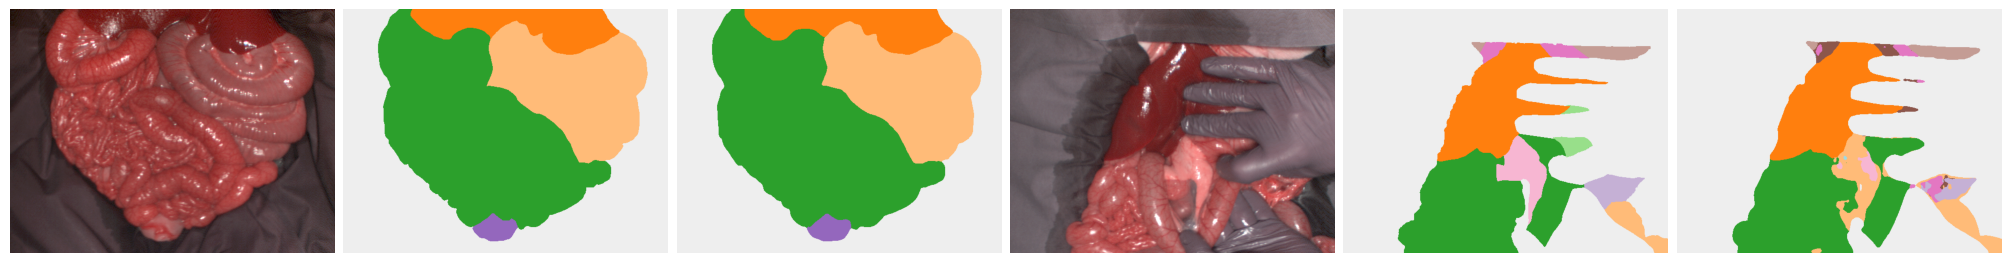

In [7]:
fig, ax = plt.subplots(ncols=6, figsize=(20, 6), constrained_layout=True)
ax[0].imshow(indistr_rgb_img)
ax[1].imshow(indistr_reference_img)
ax[2].imshow(indistr_preds_baseline_img)
ax[3].imshow(rgb_img)
ax[4].imshow(reference_img)
ax[5].imshow(preds_baseline_img)
for a in ax:
    a.set_axis_off()

## Legend

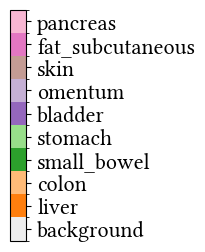

In [8]:
# Colorbar based on the occurring label names/colors
# labels = (
#    set(np.unique(indistr_reference)).union(set(np.unique(preds_context))).union(set(sample["labels"].unique().numpy()))
# )
labels1 = np.unique(sample["labels"])
labels2 = np.unique(indistr_reference)
labels = np.unique(np.concatenate([labels1, labels2]))
color_mapping = {label_mapping.index_to_name(l): label_mapping.index_to_color(l) for l in labels}

cmap = mpl.colors.ListedColormap(list(color_mapping.values()))
bounds = list(range(len(color_mapping)))
bounds.append(max(bounds) + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(0.2, 3), dpi=100)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax)

# We want the ticks to be placed in the middle of the box
tick_names = [l.replace("<br>", "\n") for l in color_mapping.keys()]
r = cbar.vmax - cbar.vmin
cbar.set_ticks([cbar.vmin + r / len(tick_names) * (0.5 + i) for i in range(len(tick_names))])
cbar.ax.set_yticklabels(tick_names)
cbar.ax.tick_params(pad=5)
fig.savefig(settings_context.paper_dir / "failure_example_cbar.pdf", bbox_inches="tight")